# Training a neuron to compute AND function

Let us extend the neuron created in the previous section to compute an AND function. It now takes two inputs and tries to compute the following truth table:-

|inp1 | inp2 | out |
|-|
| 0 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

Since there are two inputs, we require two weights to compute the output:-

$$ a = \sigma(w_1x_1+w_2x_2+b)$$

Extending the formula from the previous section:-

$$\frac{\partial C}{\partial w_1} = \frac{1}{n}\Sigma(a-e) * a * (1-a) * x_1$$

$$\frac{\partial C}{\partial w_2} = \frac{1}{n}\Sigma(a-e) * a * (1-a) * x_2$$

$$\frac{\partial C}{\partial b} = \frac{1}{n}\Sigma(a-e) * a * (1-a)$$

Let us repeat the same process as before:-

## Initialization

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1.0/(1+np.exp(-z))

inp = [[0, 0], [0, 1], [1, 0], [1, 1]]
outp = [0, 0, 0, 1]

w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

Again, let us compute the AND function using the initial parameters.

Weight1: 0.546567715148; Weight2: 0.628020658454; Bias: 0.882172280316
Input1 = 0; Input2 = 0; Output = 0.707272168618; Expected = 0; Error = 0.707272168618
Input1 = 0; Input2 = 1; Output = 0.819089798603; Expected = 0; Error = 0.819089798603
Input1 = 1; Input2 = 0; Output = 0.806704916545; Expected = 0; Error = 0.806704916545
Input1 = 1; Input2 = 1; Output = 0.886628964777; Expected = 1; Error = -0.113371035223
Cost = 0.458691958171


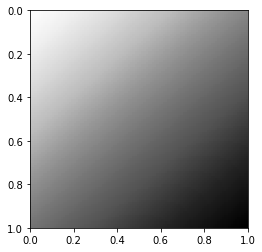

In [2]:
def print_error(w1, w2, b):
    print "Weight1: {0}; Weight2: {1}; Bias: {2}".format(w1, w2, b)
    
    error = 0
    
    for i in range(4):
        x1,x2 = inp[i]
        e = outp[i]
        a = sigmoid(w1*x1 + w2*x2 + b)
    
        err = a-e
    
        print "Input1 = {0}; Input2 = {1}; Output = {2}; Expected = {3}; Error = {4}".format(x1, x2, a, e, err)
    
        error += err**2
    
    error /= 4

    print "Cost = {0}".format(error)
    
    x1 = np.arange(0, 1, 0.01)
    x2 = np.arange(0, 1, 0.01)
    X1, X2 = np.meshgrid(x1, x2)
    Z = sigmoid(w1*X1 + w2*X2 + b)
    im = plt.imshow(Z, cmap=plt.cm.Greys, extent=(0, 1, 1, 0))
    cset = plt.contour(Z, np.array([0.5]), extent=(0,1,0,1))
    plt.clabel(cset)
    plt.show()
    
print_error(w1, w2, b)

Let us perform gradient descent:-

Del_w1 = 0.0285988380877; Del_w2 = 0.0274945711247; Del_b = 0.0955504655606
New weight1 = 0.517968877061; New weight2 = 0.60052608733; New bias = 0.786621814755
Weight1: 0.517968877061; Weight2: 0.60052608733; Bias: 0.786621814755
Input1 = 0; Input2 = 0; Output = 0.687105508839; Expected = 0; Error = 0.687105508839
Input1 = 0; Input2 = 1; Output = 0.800136531586; Expected = 0; Error = 0.800136531586
Input1 = 1; Input2 = 0; Output = 0.786606575135; Expected = 0; Error = 0.786606575135
Input1 = 1; Input2 = 1; Output = 0.870469548769; Expected = 1; Error = -0.129530451231
Cost = 0.436965122824


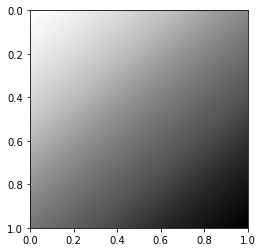

In [3]:
def improve_parameters(w1, w2, b):
    del_w1 = 0
    del_w2 = 0
    del_b = 0
    error = 0
    
    for i in range(4):
        x1,x2 = inp[i]
        e = outp[i]
        a = sigmoid(w1*x1 + w2*x2 + b)
    
        del_w1 += (a-e) * a * (1-a) * x1
        del_w2 += (a-e) * a * (1-a) * x2
        del_b += (a-e) * a * (1-a)
        error += (a-e)**2/2

    del_w1 /= 4
    del_w2 /= 4
    del_b /= 4
    error /= 4
    
    return (del_w1, del_w2, del_b, error)

del_w1, del_w2, del_b, error = improve_parameters(w1, w2, b)
w1 -= del_w1
w2 -= del_w2
b -= del_b
print "Del_w1 = {0}; Del_w2 = {1}; Del_b = {2}".format(del_w1, del_w2, del_b)
print "New weight1 = {0}; New weight2 = {1}; New bias = {2}".format(w1, w2, b)

print_error(w1, w2, b)

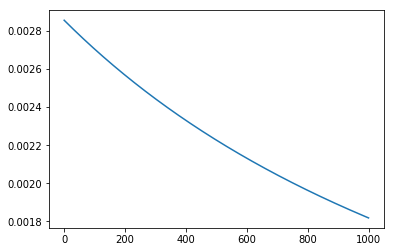

Weight1: 5.13660325043; Weight2: 5.13660325859; Bias: -7.79927007401
Input1 = 0; Input2 = 0; Output = 0.000409866105262; Expected = 0; Error = 0.000409866105262
Input1 = 0; Input2 = 1; Output = 0.0652125760144; Expected = 0; Error = 0.0652125760144
Input1 = 1; Input2 = 0; Output = 0.0652125755172; Expected = 0; Error = 0.0652125755172
Input1 = 1; Input2 = 1; Output = 0.922294348644; Expected = 1; Error = -0.0777056513563
Cost = 0.00363592407974


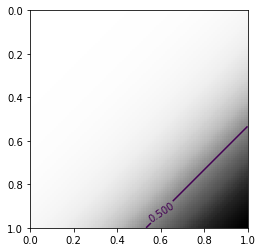

In [6]:
errors = []

for i in range(1000):
    del_w1, del_w2, del_b, error = improve_parameters(w1, w2,b)
    
    w1 -= del_w1
    w2 -= del_w2
    b -= del_b
    
    errors.append(error)
    
plt.plot(errors)
plt.show()

print_error(w1, w2, b)